# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Loading Dataset

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

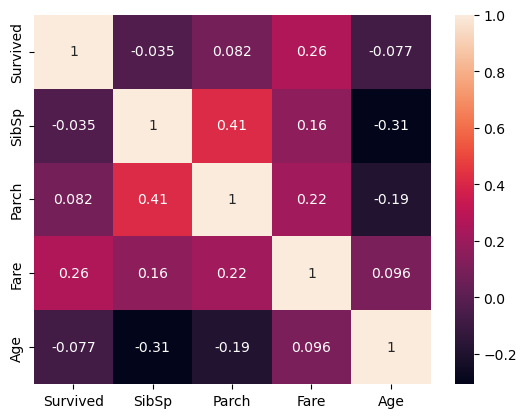

In [7]:
heatmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

## sibsp - Number of siblings/ spouses aboard the Titanic

In [8]:
data['SibSp'].nunique()

7

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


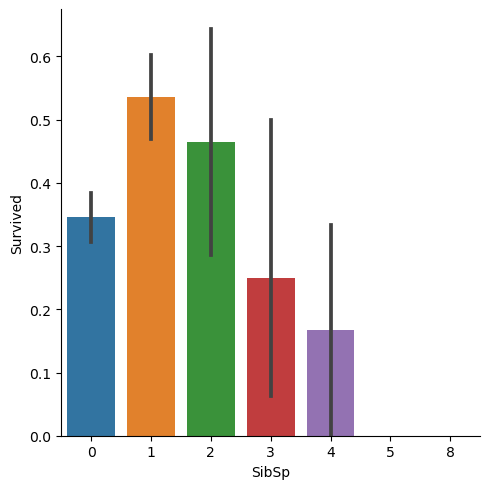

In [10]:
sns.factorplot(x = 'SibSp', y = 'Survived', data = data, kind = 'bar')

## Age


C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


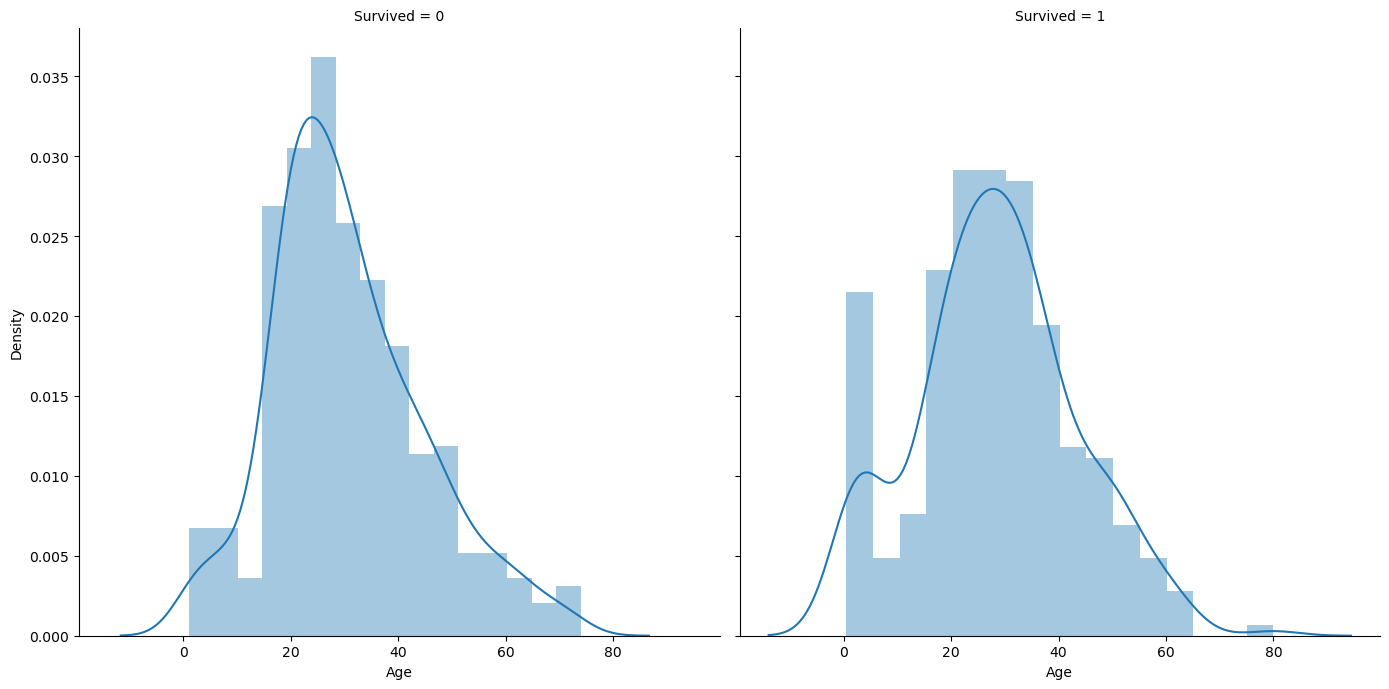

In [11]:
age_visual = sns.FacetGrid(data, col = 'Survived', size = 7)
age_visual = age_visual.map(sns.distplot, "Age")

## Sex

C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


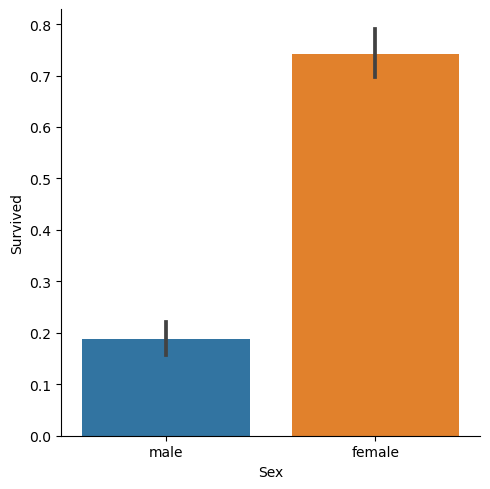

In [12]:
sns.factorplot(x = 'Sex', y = 'Survived', data = data, kind = 'bar')

## PClass

C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


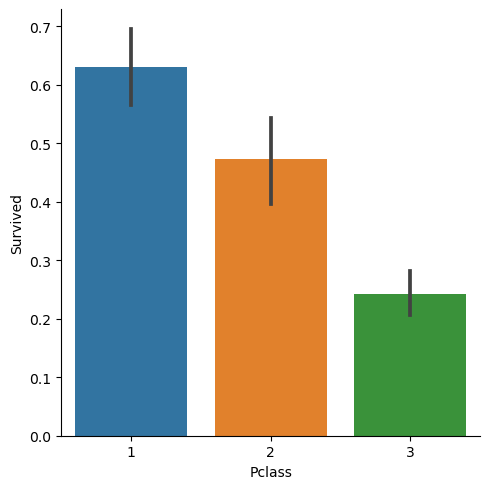

In [13]:
sns.factorplot(x = 'Pclass', y = 'Survived', data = data, kind = 'bar')

C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


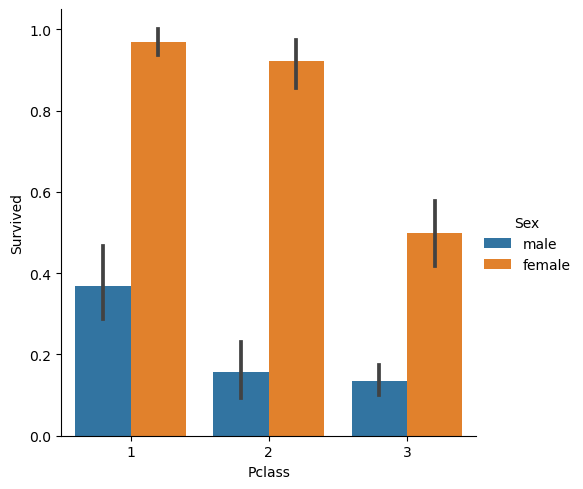

In [14]:
sns.factorplot(x = 'Pclass', y = 'Survived', data = data, kind = 'bar', hue="Sex")

## Embarked

In [15]:
data['Embarked'].isnull().sum()

2

In [16]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data['Embarked'] = data['Embarked'].fillna('S')

In [18]:
data['Embarked'].isnull().sum()

0

In [19]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\ayanl\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


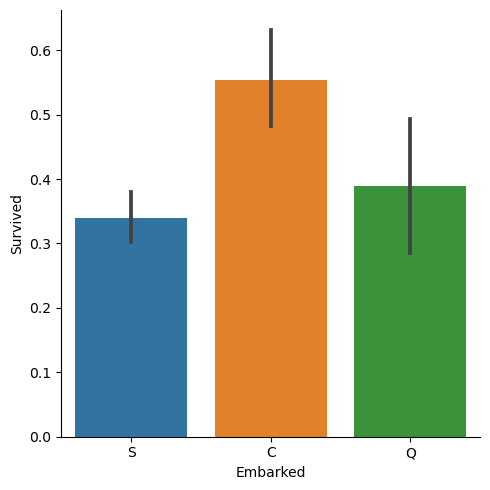

In [20]:
sns.factorplot(x = 'Embarked', y = 'Survived', data = data, kind = 'bar')

# Preparing Data

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()

In [23]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [24]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

In [25]:
rand_age

array([33, 20, 32, 39, 31, 40, 25, 17, 20, 16, 24, 43, 26, 36, 26, 21, 21,
       41, 17, 17, 34, 20, 24, 26, 19, 17, 35, 37, 20, 33, 35, 18, 26, 33,
       38, 36, 28, 24, 24, 43, 38, 39, 15, 23, 18, 23, 43, 32, 39, 16, 37,
       28, 41, 41, 35, 18, 24, 29, 23, 43, 18, 27, 16, 34, 29, 29, 26, 18,
       30, 37, 30, 31, 25, 19, 41, 40, 41, 27, 24, 42, 31, 18, 42, 40, 27,
       18, 34, 29, 25, 39, 21, 34, 31, 37, 30, 20, 18, 28, 32, 23, 35, 41,
       17, 34, 34, 24, 38, 32, 37, 29, 23, 25, 18, 30, 27, 15, 34, 34, 27,
       30, 43, 22, 37, 23, 34, 29, 40, 33, 42, 35, 38, 29, 30, 31, 15, 30,
       16, 30, 24, 27, 19, 25, 36, 20, 33, 16, 15, 28, 17, 24, 35, 29, 34,
       15, 42, 40, 24, 43, 21, 32, 42, 31, 21, 29, 39, 19, 27, 21, 30, 29,
       25, 34, 16, 38, 42, 26, 24])

In [26]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [27]:
data['Age'].isnull().sum()

0

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis=1, inplace=True)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
genders = {'male' : 0, 'female' : 1}
data['Sex'] = data['Sex'].map(genders)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [33]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
data['Embarked'] = data['Embarked'].map(ports)

In [34]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting the Data

In [35]:
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

# Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [38]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000)

In [39]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [40]:
logreg_predict = logreg.predict(xtest)
svc_classifier_predict = svc_classifier.predict(xtest)
dt_classifier_predict = dt_classifier.predict(xtest)
knn_classifier_predict = knn_classifier.predict(xtest)
rf_classifier_predict = rf_classifier.predict(xtest)

In [43]:
logreg_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

logreg_accuracy = accuracy_score(ytest, logreg_predict)
svc_classifier_accuracy = accuracy_score(ytest, svc_classifier_predict)
dt_classifier_accuracy = accuracy_score(ytest, dt_classifier_predict)
knn_classifier_accuracy = accuracy_score(ytest, knn_classifier_predict)
rf_classifier_accuracy = accuracy_score(ytest, rf_classifier_predict)

In [42]:
print("Logistic Regression : ", round(logreg_accuracy*100,2))
print("Support Vector      : ", round(svc_classifier_accuracy*100,2))
print("Decision Tree       : ", round(dt_classifier_accuracy*100,2))
print("K Nearest Neighbour : ", round(knn_classifier_accuracy*100,2))
print("Random Forest       : ", round(rf_classifier_accuracy*100,2))

Logistic Regression :  80.97
Support Vector      :  81.72
Decision Tree       :  74.63
K Nearest Neighbour :  80.6
Random Forest       :  80.97


In [44]:
import streamlit as st

In [45]:
st.title('Did they survive? :ship:')
# PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
passengerid = st.text_input("Input Passenger ID", '123456') 
pclass = st.selectbox("Choose class", [1,2,3])
name  = st.text_input("Input Passenger Name", 'John Smith')
sex = st.select_slider("Choose sex", ['male','female'])
age = st.slider("Choose age",0,100)
sibsp = st.slider("Choose siblings",0,10)
parch = st.slider("Choose parch",0,2)
ticket = st.text_input("Input Ticket Number", "12345") 
fare = st.number_input("Input Fare Price", 0,1000)
cabin = st.text_input("Input Cabin", "C52") 
embarked = st.select_slider("Did they Embark?", ['S','C','Q'])

2024-01-01 12:18:02.517 
  command:

    streamlit run C:\Users\ayanl\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-01-01 12:18:02.517 Session state does not function when running a script without `streamlit run`
